In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 4000)

In [3]:
data = pd.read_csv("data/part-header.csv", sep=",")
# data.head(5)

In [4]:
data = data.replace(['CO', 'AA', 'WN', 'UA', 'US', 'DL', 'YV', 'TW', 'AS', 'NW', 'MQ', 'B6', 'OH', 'HA', 'EV', 
            'AQ', '9E', 'DH', 'OO', 'HP', 'XE', 'FL', 'F9', 'TZ', 'PA (1)', 'EA', 'PI', 'PS', 'ML (1)'], 
           ['Continental Airlines Inc. (CO)', 'American Airlines Inc. (AA)', 'Southwest Airlines Co. (WN)', 
            'United Airlines Inc. (UA)', 'US Airways Inc. (US)', 'Delta Airlines Inc. (DL)', 
            'Mesa Airlines Inc. (YV)', 'Trans World Airways LLC (TW)', 'Alaska Airlines Inc. (AS)', 
            'Northwest Airlines Inc. (NW)', 'American Eagle Airlines (MQ)', 'JetBlue Airways (B6)', 
            'Comair Inc. (OH)', 'Hawaiian Airlines Inc. (HA)', 'Atlantic Southeast Airlines (EV)', 
            'Aloha Airlines Inc. (AQ)', 'Pinnacle Airlines Inc. (9E)', 'Independence Air (DH)', 
            'SkyWest Airlines Inc. (OO)', 'America West Airlines Inc. (HP)', 'ExpressJet Airlines Inc. (XE)', 
            'AirTran Airways (FL)', 'Frontier Airlines Inc. (F9)', 'ATA Airlines (TZ)', 
            'Pan American World Airways (PA (1))', 'Eastern Air Lines (EA)', 'Piedmont Aviation Inc. (PI)', 
            'Pacific Southwest Airlines (PS)', 'Midway Airlines (ML (1))'])

In [6]:
# data.shape
# data.to_csv('data/raw_data.csv', index=False, encoding='utf-8')
data.carrier.unique()

array(['Delta Airlines Inc. (DL)', 'SkyWest Airlines Inc. (OO)',
       'American Airlines Inc. (AA)', 'American Eagle Airlines (MQ)',
       'Continental Airlines Inc. (CO)', 'US Airways Inc. (US)',
       'Trans World Airways LLC (TW)', 'ExpressJet Airlines Inc. (XE)',
       'Northwest Airlines Inc. (NW)', 'Alaska Airlines Inc. (AS)',
       'America West Airlines Inc. (HP)', 'United Airlines Inc. (UA)',
       'Piedmont Aviation Inc. (PI)', 'Comair Inc. (OH)',
       'Frontier Airlines Inc. (F9)', 'Southwest Airlines Co. (WN)',
       'Pan American World Airways (PA (1))', 'Mesa Airlines Inc. (YV)',
       'Eastern Air Lines (EA)', 'Atlantic Southeast Airlines (EV)',
       'JetBlue Airways (B6)', 'AirTran Airways (FL)',
       'Pinnacle Airlines Inc. (9E)', 'Midway Airlines (ML (1))',
       'Aloha Airlines Inc. (AQ)', 'Independence Air (DH)',
       'ATA Airlines (TZ)', 'Hawaiian Airlines Inc. (HA)',
       'Pacific Southwest Airlines (PS)'], dtype=object)

In [7]:
df = data.sort_values(by=['year','month'], ascending=[True,True])
df.head(5)

,year,month,carrier,depAirport,totalFlights,totalDelayedFlights,totalDelay
66,1987,10,United Airlines Inc. (UA),ABQ,188,79,670
85,1987,10,Delta Airlines Inc. (DL),SMF,262,62,985
118,1987,10,America West Airlines Inc. (HP),PDX,111,36,336
147,1987,10,US Airways Inc. (US),PWM,153,95,661
199,1987,10,Delta Airlines Inc. (DL),SAN,520,153,3256


In [8]:
sz = df.groupby(['carrier', 'year'])['totalFlights', 'totalDelayedFlights', 'totalDelay'].sum()
sz = sz.reset_index()
sz['year'] = sz['year'].astype('str')
sz.head(5)

,carrier,year,totalFlights,totalDelayedFlights,totalDelay
0,ATA Airlines (TZ),2003,68321,18320,584599
1,ATA Airlines (TZ),2004,74816,21373,642487
2,ATA Airlines (TZ),2005,43601,10400,361862
3,ATA Airlines (TZ),2006,19375,6651,298453
4,AirTran Airways (FL),2003,143086,37951,1398438


In [9]:
sz['totalDelayedFlightsofYear'] = np.where(sz['year']=='1987', 
(sz.loc[sz['year'] == '1987', 'totalDelayedFlights'].sum()), sz['totalDelayedFlights'])

years = ['1988','1989','1990','1991','1992','1993','1994', '1995', '1996', '1997', '1998', '1999', 
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']
for year in years:
    sz['totalDelayedFlightsofYear'] = np.where(sz['year']==year, 
       (sz.loc[sz['year'] == year, 'totalDelayedFlights'].sum()), sz['totalDelayedFlightsofYear'])

In [10]:
sz['totDelaytototDelayedFl'] = np.where(sz['year']=='1987', 
(sz['totalDelayedFlights']/sz['totalDelayedFlightsofYear'])*100, sz['totalDelayedFlights'])

years = ['1988','1989','1990','1991','1992','1993','1994', '1995', '1996', '1997', '1998', '1999', 
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']
for year in years:
    sz['totDelaytototDelayedFl'] = np.where(sz['year']==year, 
       (sz['totalDelayedFlights']/sz['totalDelayedFlightsofYear'])*100, sz['totDelaytototDelayedFl'])

In [11]:
# sz = sz.loc[sz['year'] == '1987']
sz.head(5)

,carrier,year,totalFlights,totalDelayedFlights,totalDelay,totalDelayedFlightsofYear,totDelaytototDelayedFl
0,ATA Airlines (TZ),2003,68321,18320,584599,1859205,0.985367
1,ATA Airlines (TZ),2004,74816,21373,642487,2412683,0.885860
2,ATA Airlines (TZ),2005,43601,10400,361862,2537861,0.409794
3,ATA Airlines (TZ),2006,19375,6651,298453,2825655,0.235379
4,AirTran Airways (FL),2003,143086,37951,1398438,1859205,2.041249


In [12]:
top_year = sz.pivot(index='year', columns='carrier', values='totDelaytototDelayedFl')
# top_year

<h3>Percentage of the delayed flights per carrier over time</h3>

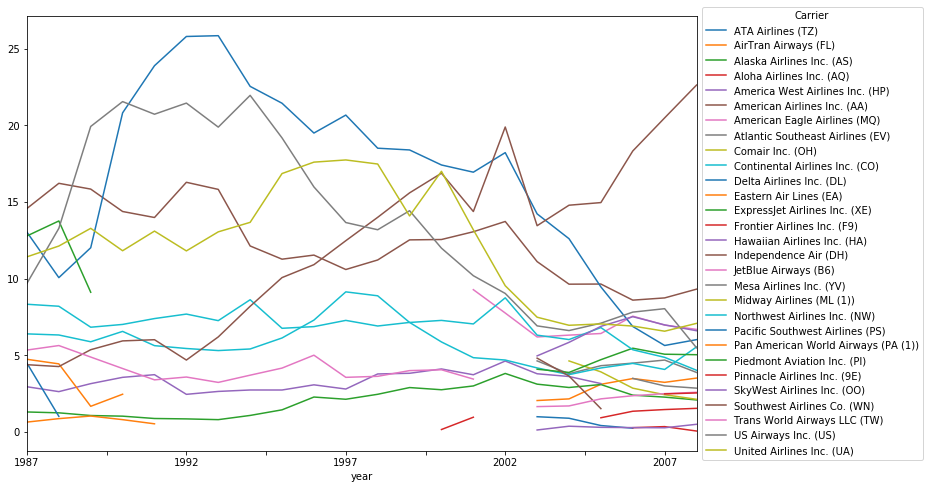

In [13]:
top_year.plot(figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

/home/marilia/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


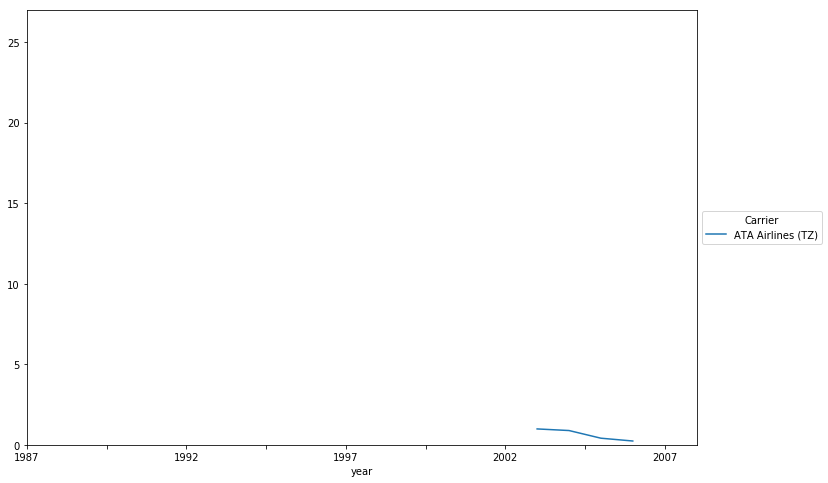

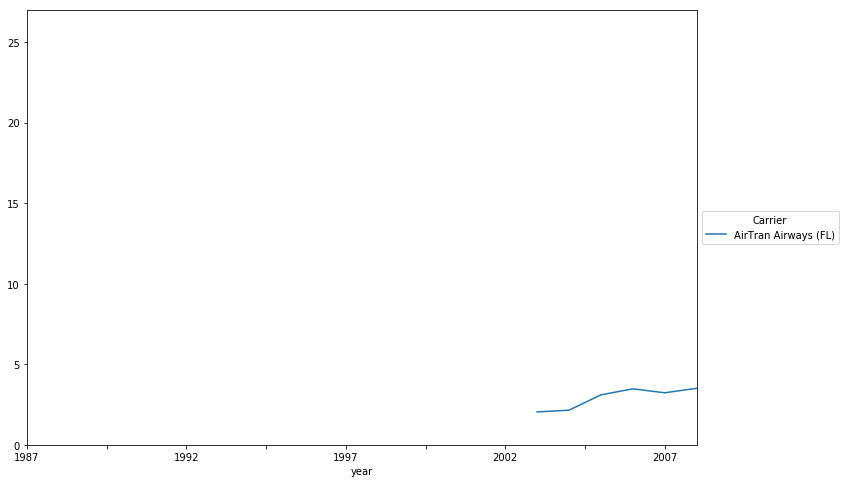

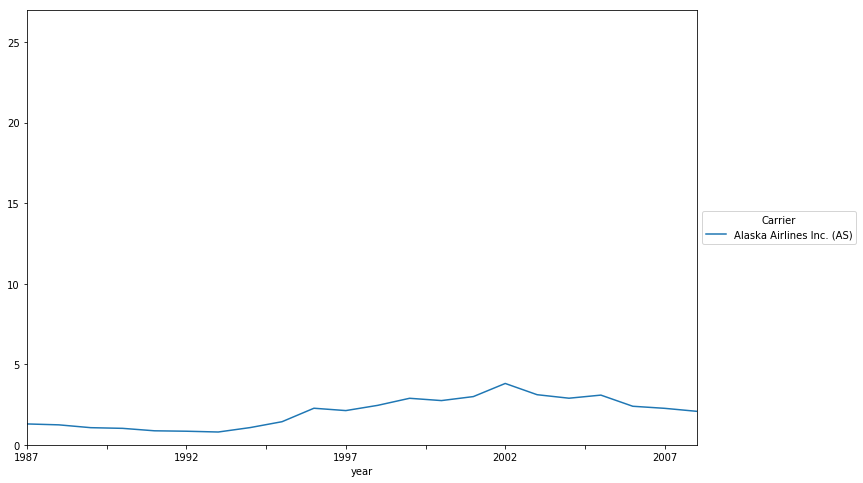

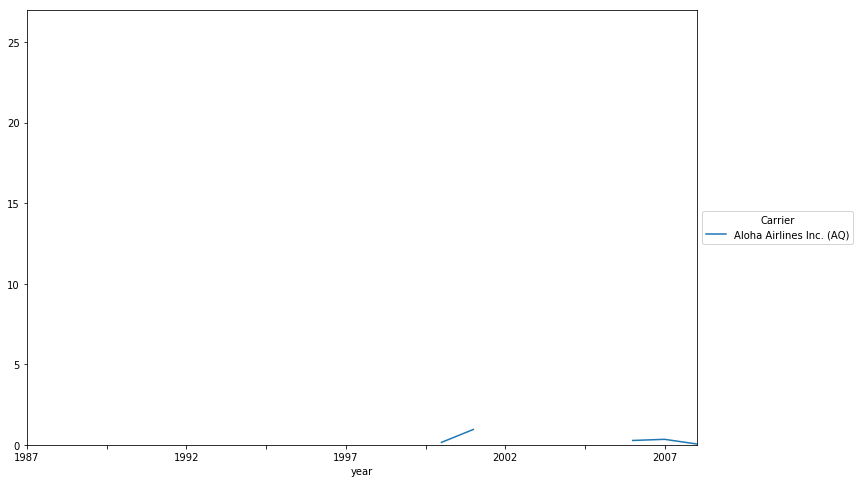

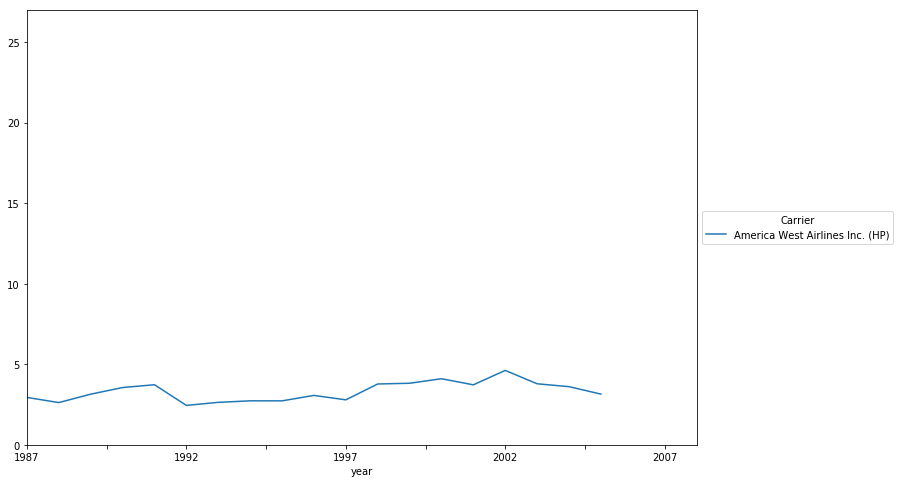

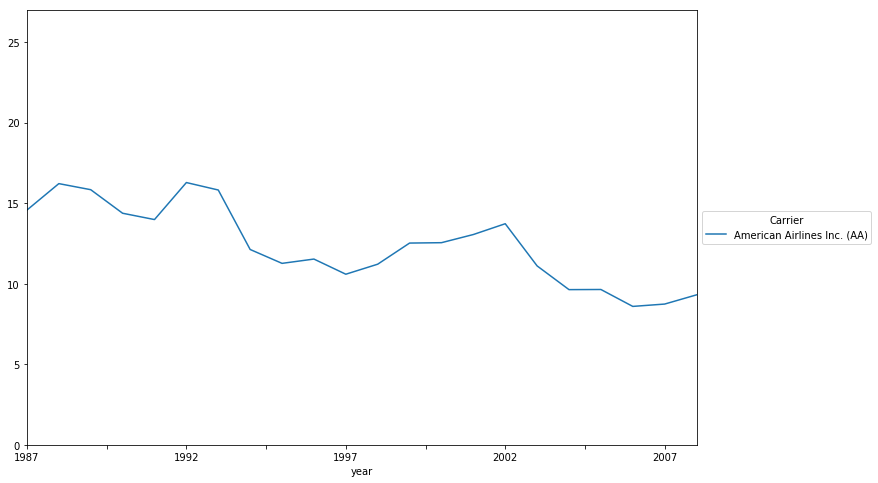

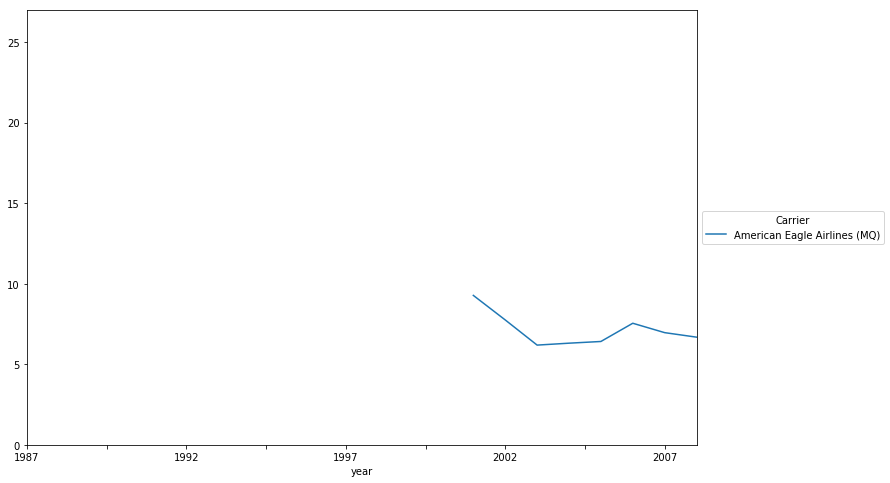

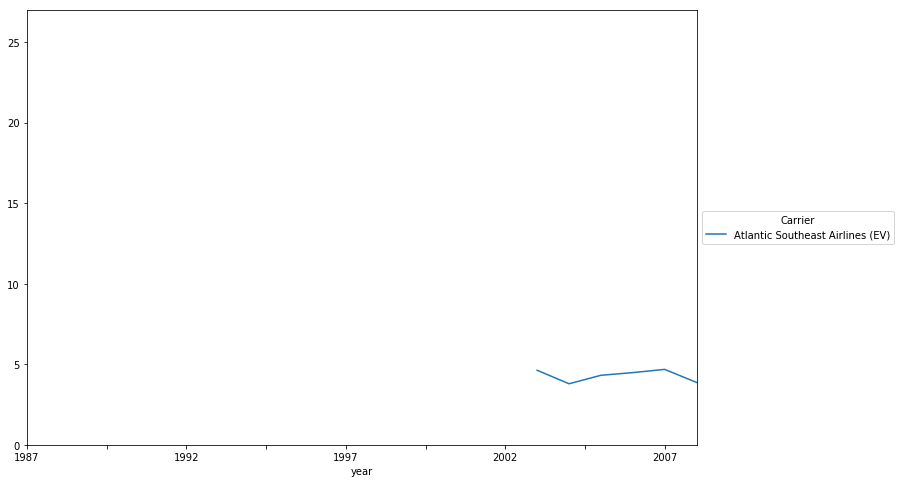

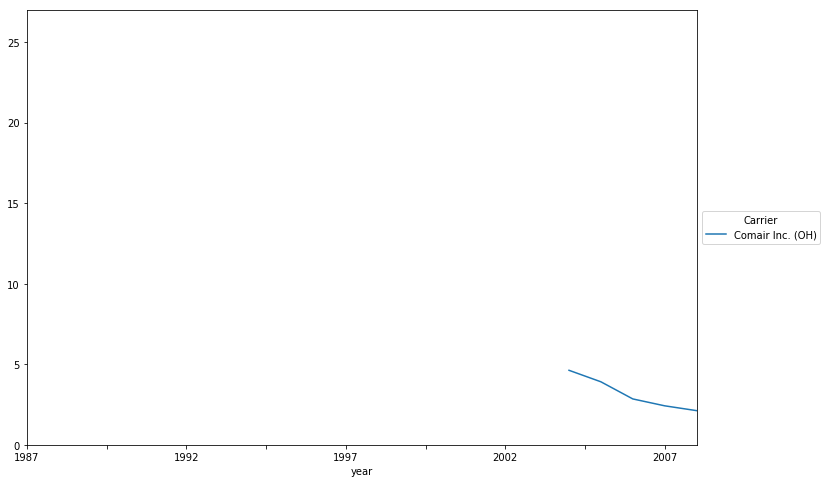

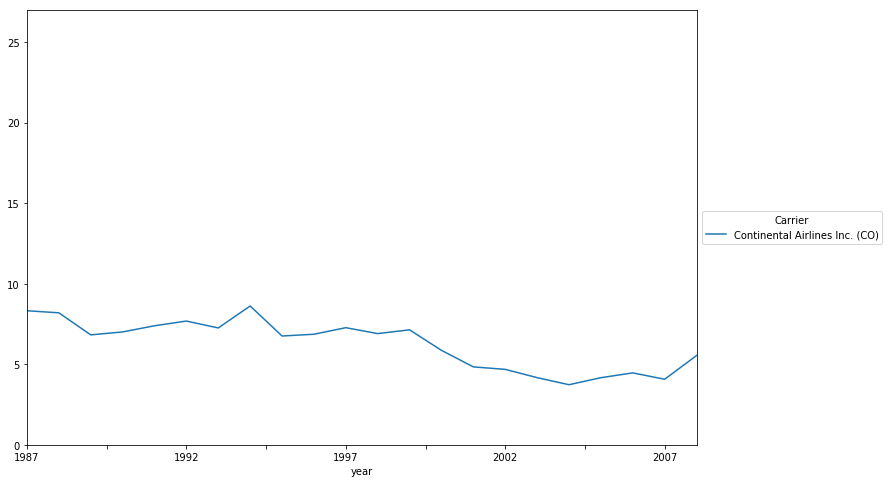

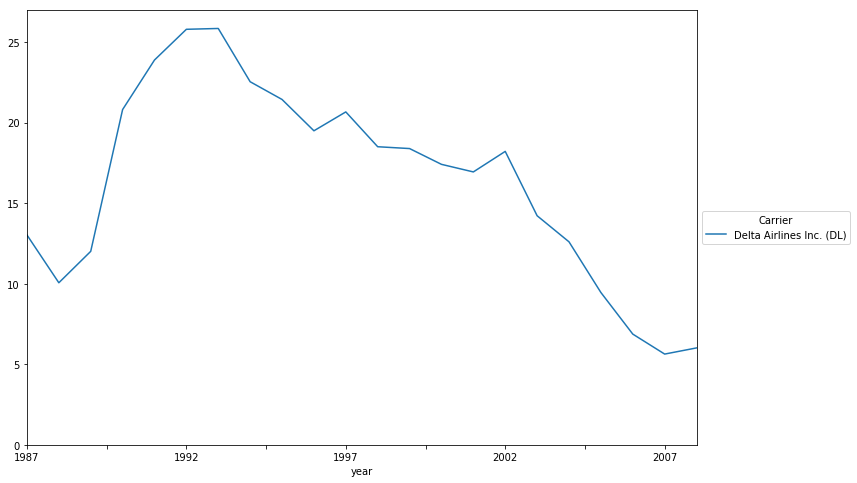

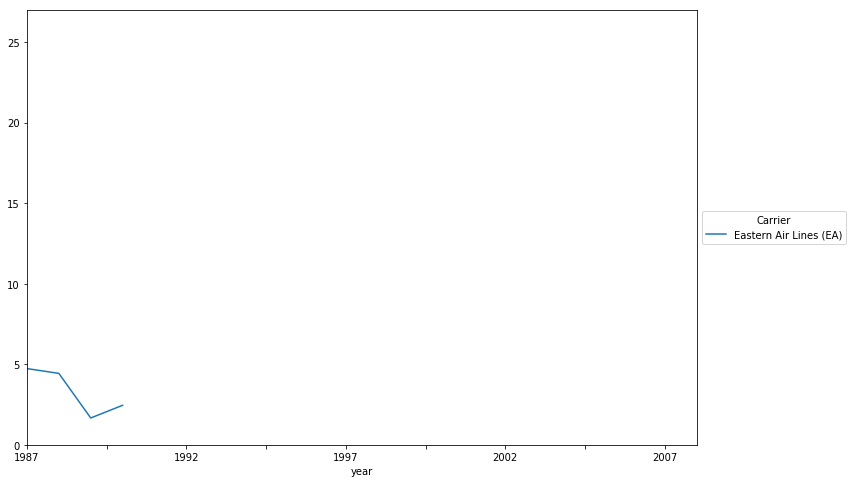

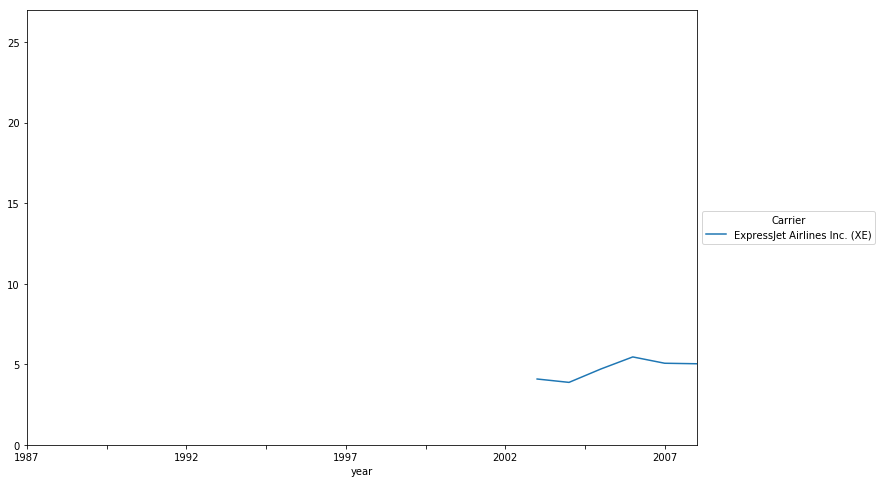

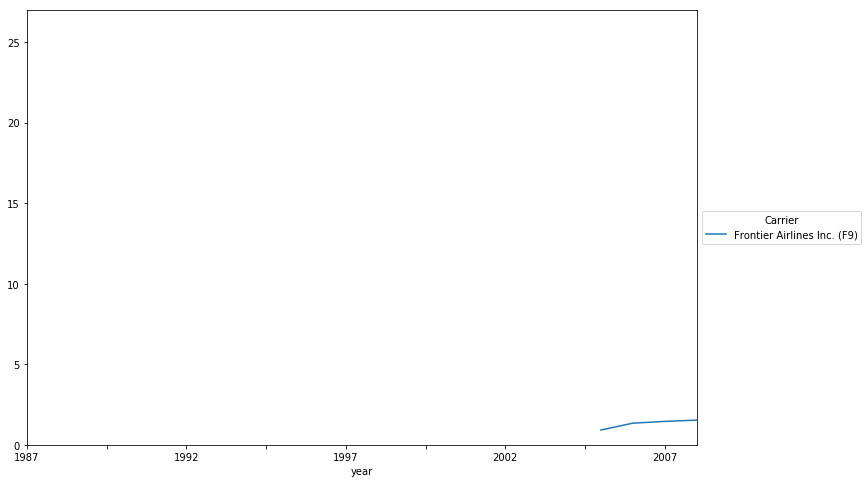

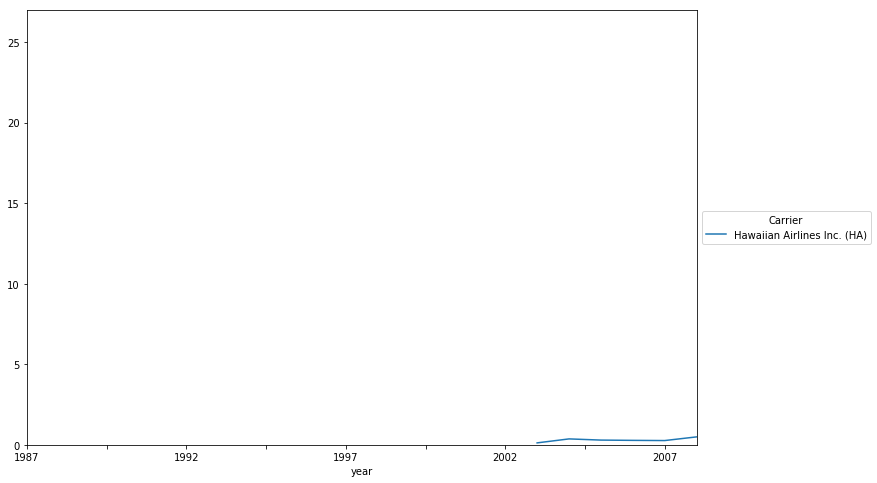

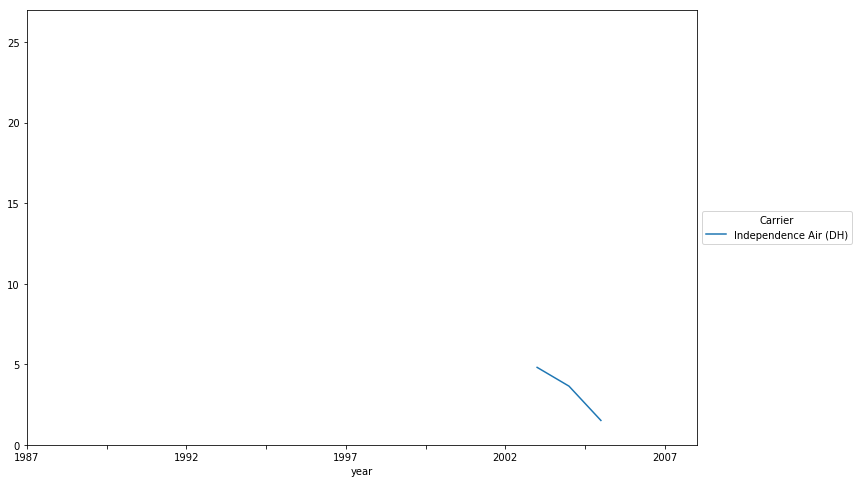

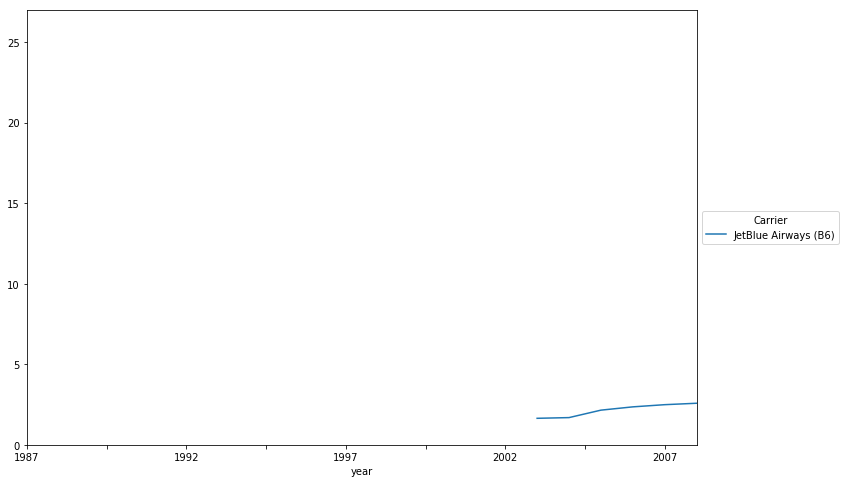

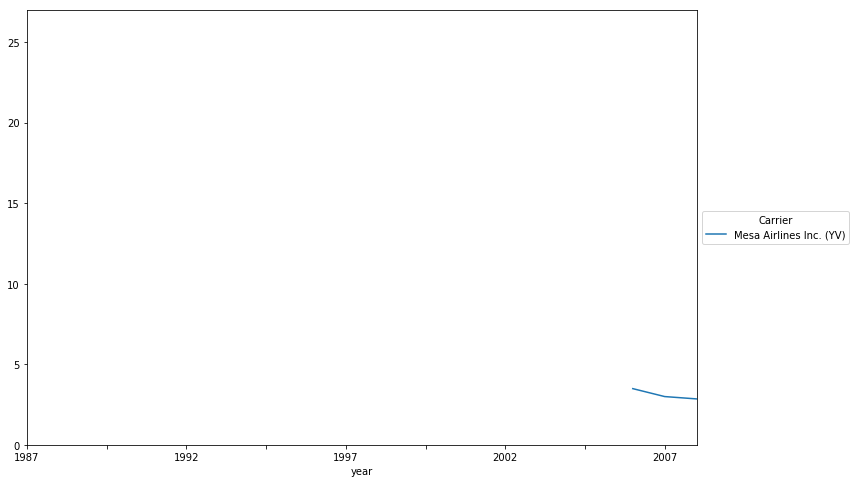

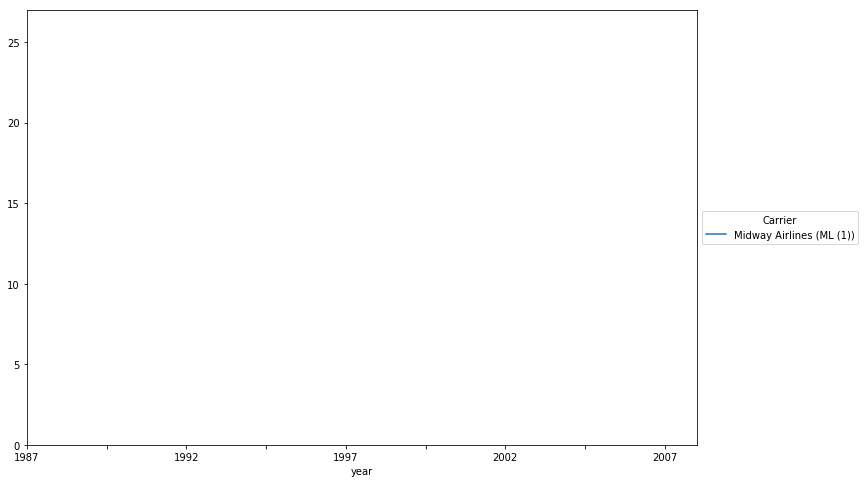

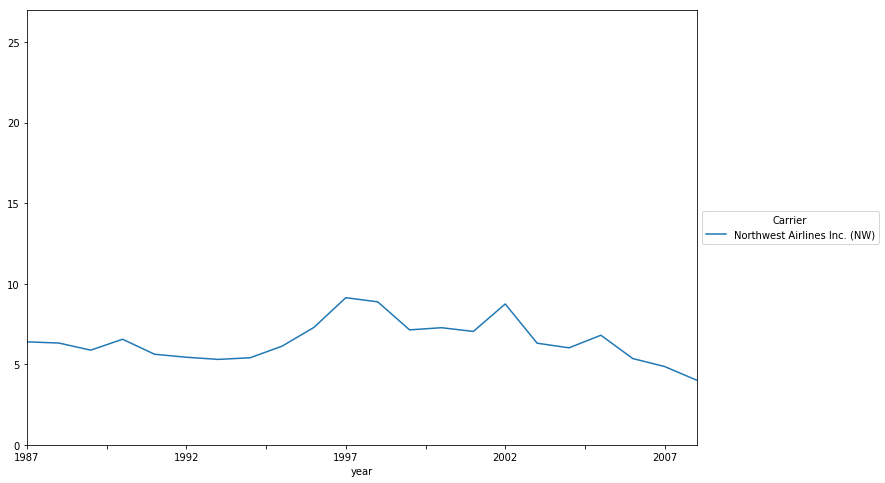

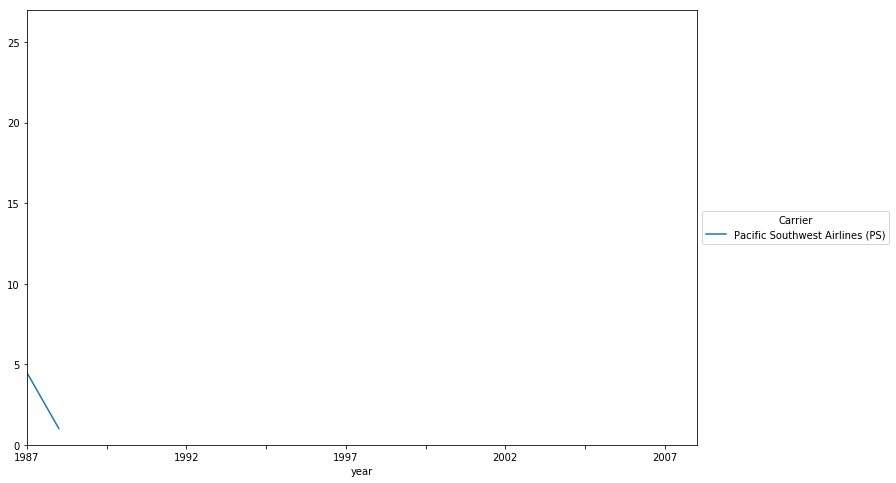

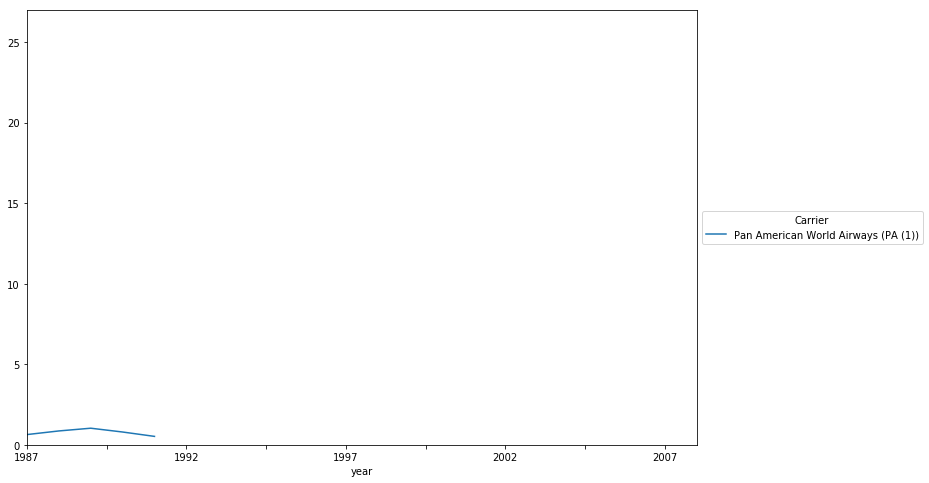

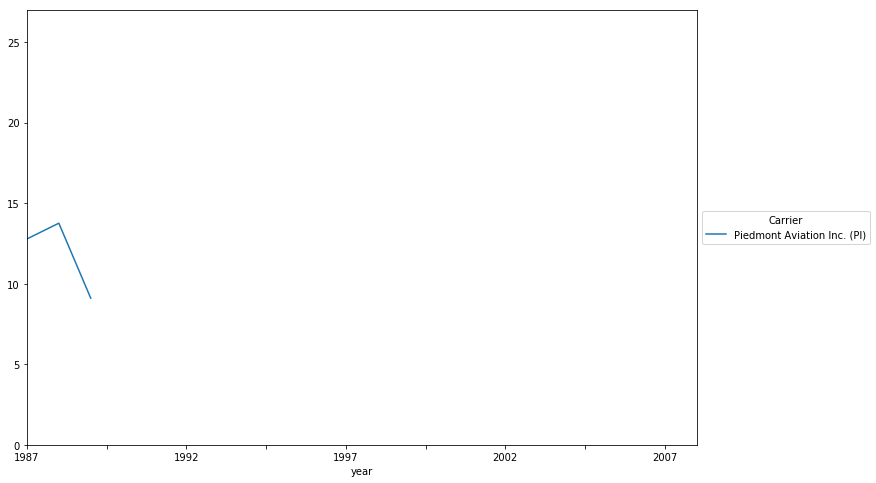

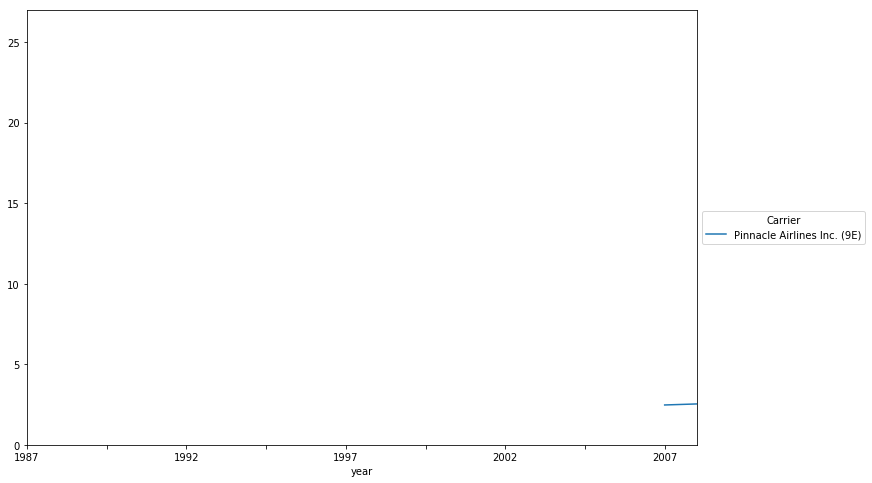

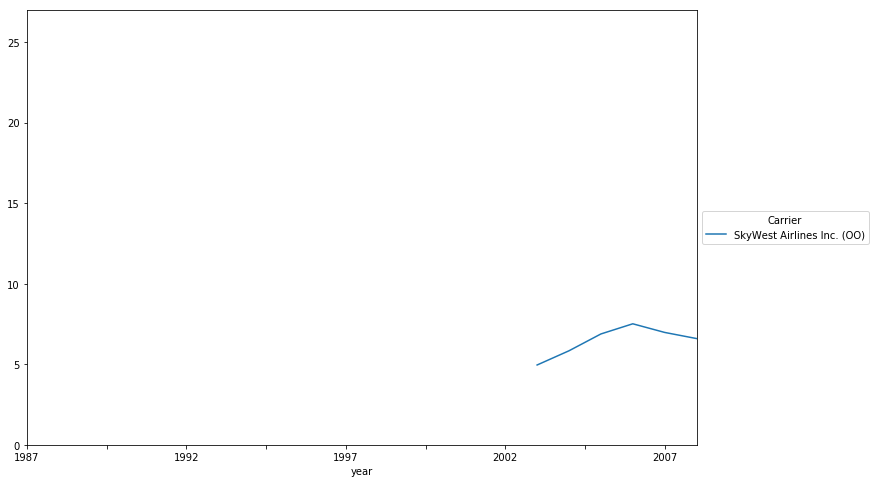

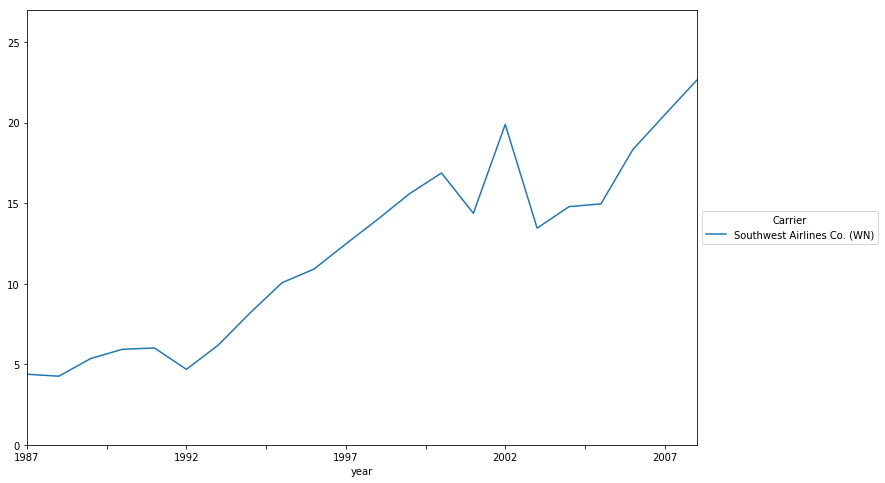

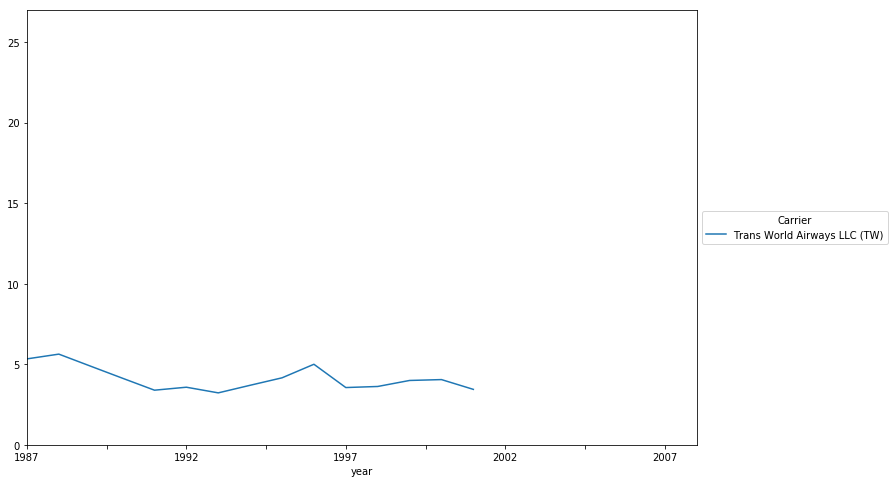

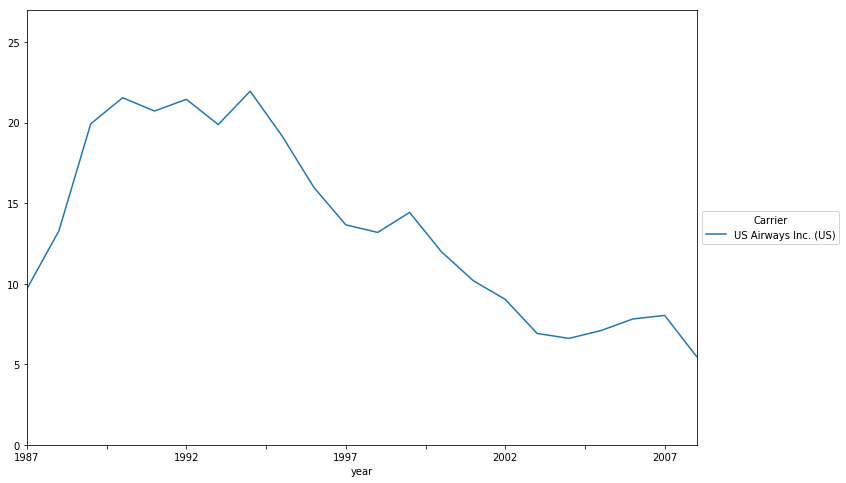

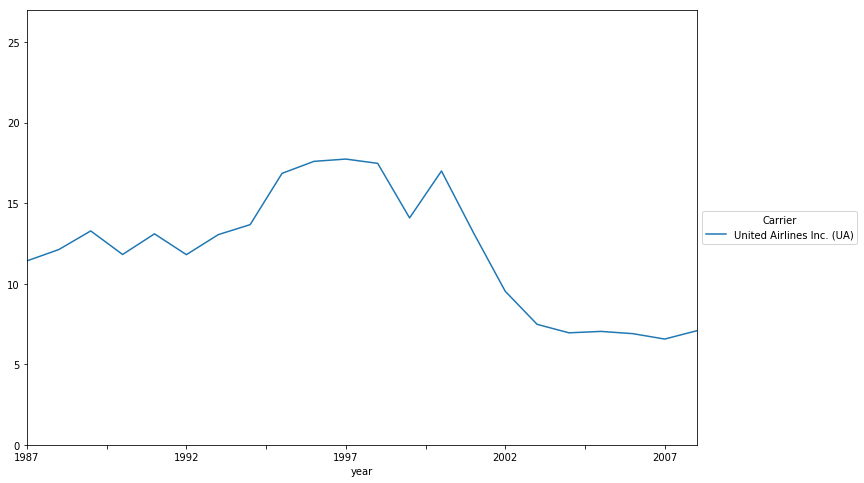

In [14]:
for i in range(0, 29):
    top_year.iloc[:,i:(i+1)].plot(ylim=(0, 27),figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

In [ ]:
# for i in range(0, 29):
#     top_year.iloc[:,0:i+1].plot(ylim=(0, 27),figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

In [ ]:
# top_year.to_csv('data/totalDelayedFlights.csv', index=True, header=True, encoding='utf-8')

In [ ]:
# for i in range(0, 29):
#     top_year.iloc[:,i:(i+1)].plot(ylim=(0, 27),figsize=(12, 8)).legend(title='Carrier')
#     plt.savefig('delayed_fl_figures/carrier' + str(i) + '.png')